Import necessary libraries

In [749]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

Import the dataframe.

In [750]:
df = pd.read_csv("Mapping the use of AI  (Responses) - Form Responses 2.csv")
df.head()

,Timestamp,Are you a native or non-native English speaker?,What is your principal field of study?,"Have you ever heard of Artificial Intelligence (AI) tools, such as ChatGPT, Grammarly, Claude, etc.?","Do you use AI tools (such as ChatGPT, Grammarly, or any other AI tool) in your academic life? Please answer 'Yes' even if you use them only rarely; you will have the opportunity to specify how often in the next question.","How frequently do you use AI tools (e.g., ChatGPT, Grammarly, Claude, etc.)? A rating of 1 indicates very rare use, while a rating of 5 indicates daily use. Higher numbers represent more frequent usage.",For which specific purposes do you use these AI tools? (Select all that apply),Which AI tool do you use most frequently? (Select all that apply),Do you consent to participate in this study?
0,9/18/2024 18:51:09,Native English Speaker,Business Administration,Yes,Yes,1.0,Proofreading and Grammar Checking,ChatGPT,NaN
1,9/23/2024 20:58:23,Native English Speaker,Computer Science,Yes,Yes,3.0,"Proofreading and Grammar Checking, Generating ...","ChatGPT, Snapchat AI",I do consent
2,9/23/2024 21:39:37,Non-Native English Speaker,Data Science,Yes,Yes,4.0,"Proofreading and Grammar Checking, Generating ...","ChatGPT, Grammarly",I do consent
3,9/24/2024 16:30:57,Non-Native English Speaker,Computer Science,Yes,Yes,3.0,"Completing Assignments, Proofreading and Gramm...","ChatGPT, Grammarly",I do consent
4,9/24/2024 18:03:13,Native English Speaker,Exercise Science,Yes,No,1.0,NaN,NaN,I do consent


Rename the columns of the dataframe.

In [751]:
# Remove all spaces from columns name first
df.columns = df.columns.str.strip()


# Rename the colmuns
df = df.rename(columns={"Are you a native or non-native English speaker?": "Language",
                        "What is your principal field of study?": "Field_of_study",
                        "Have you ever heard of Artificial Intelligence (AI) tools, such as ChatGPT, Grammarly, Claude, etc.?":"AI_aw",
                        "Do you use AI tools (such as ChatGPT, Grammarly, or any other AI tool) in your academic life? Please answer 'Yes' even if you use them only rarely; you will have the opportunity to specify how often in the next question.": "AI_use",
                        "How frequently do you use AI tools (e.g., ChatGPT, Grammarly, Claude, etc.)? A rating of 1 indicates very rare use, while a rating of 5 indicates daily use. Higher numbers represent more frequent usage.": "Frequency",
                        "For which specific purposes do you use these AI tools? (Select all that apply)": "Purpose",
                        "Do you consent to participate in this study?":"Consent"})

df = df.rename(columns={df.columns[7]: "AI_tool"})
df.head()

,Timestamp,Language,Field_of_study,AI_aw,AI_use,Frequency,Purpose,AI_tool,Consent
0,9/18/2024 18:51:09,Native English Speaker,Business Administration,Yes,Yes,1.0,Proofreading and Grammar Checking,ChatGPT,NaN
1,9/23/2024 20:58:23,Native English Speaker,Computer Science,Yes,Yes,3.0,"Proofreading and Grammar Checking, Generating ...","ChatGPT, Snapchat AI",I do consent
2,9/23/2024 21:39:37,Non-Native English Speaker,Data Science,Yes,Yes,4.0,"Proofreading and Grammar Checking, Generating ...","ChatGPT, Grammarly",I do consent
3,9/24/2024 16:30:57,Non-Native English Speaker,Computer Science,Yes,Yes,3.0,"Completing Assignments, Proofreading and Gramm...","ChatGPT, Grammarly",I do consent
4,9/24/2024 18:03:13,Native English Speaker,Exercise Science,Yes,No,1.0,NaN,NaN,I do consent


Drop people who did not consent to partecipate in the study

In [752]:
df = df[df["Consent"] == "I do consent"]

# Print info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 1 to 170
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       166 non-null    object 
 1   Language        166 non-null    object 
 2   Field_of_study  164 non-null    object 
 3   AI_aw           166 non-null    object 
 4   AI_use          166 non-null    object 
 5   Frequency       162 non-null    float64
 6   Purpose         152 non-null    object 
 7   AI_tool         150 non-null    object 
 8   Consent         166 non-null    object 
dtypes: float64(1), object(8)
memory usage: 13.0+ KB


Since the questions in the google form were not mandatory, some responder skipped some questions in the survey.
Therefore we have to check for missing values.

In [753]:
# Missing values in each column
print(df.isna().sum())

Timestamp          0
Language           0
Field_of_study     2
AI_aw              0
AI_use             0
Frequency          4
Purpose           14
AI_tool           16
Consent            0
dtype: int64


Drop all the missing value.

In [754]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 1 to 170
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       148 non-null    object 
 1   Language        148 non-null    object 
 2   Field_of_study  148 non-null    object 
 3   AI_aw           148 non-null    object 
 4   AI_use          148 non-null    object 
 5   Frequency       148 non-null    float64
 6   Purpose         148 non-null    object 
 7   AI_tool         148 non-null    object 
 8   Consent         148 non-null    object 
dtypes: float64(1), object(8)
memory usage: 11.6+ KB


Visualize some variables.

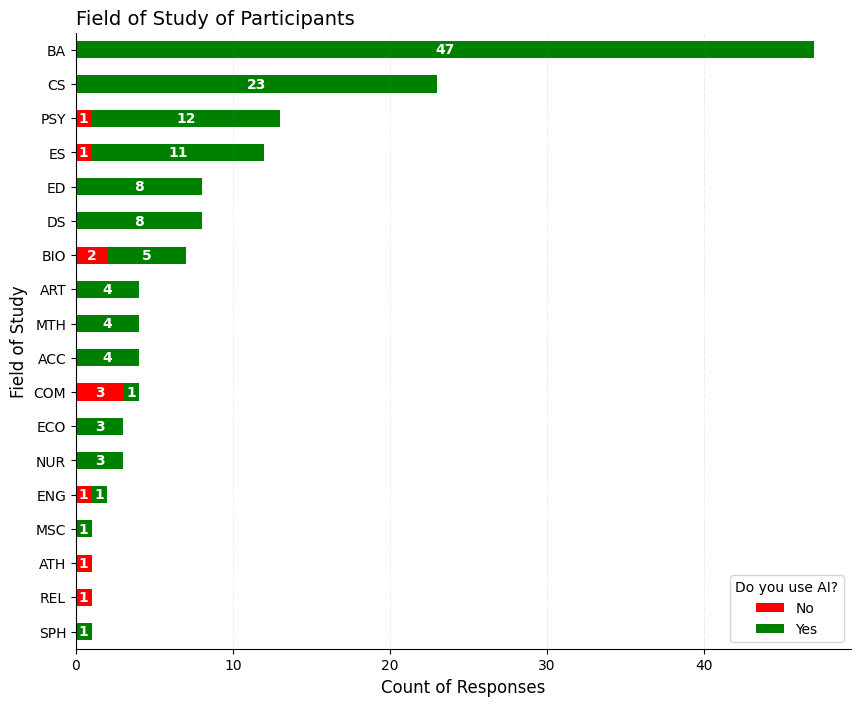

In [755]:
# Change name of values in the field_of_study column
abbreviation_map ={
    "Computer Science": "CS",
    "Mathematics": "MTH",
    "Accounting": "ACC",
    "Anthropology": "ATH",
    "Art": "ART",
    "Biology": "BIO",
    "Business Administration": "BA",
    "Chemistry": "CHE",
    "Communication": "COM",
    "Data Science": "DS",
    "Economics": "ECO",
    "English": "ENG",
    "Education": "ED",
    "Exercise Science": "ES",
    "French": "FR",
    "History":"HIS",
    "Music":"MSC",
    "Political Science":"POL",
    "Psychology":"PSY",
    "Religion":"REL",
    "Spanish":"SPH",
    "Nursing":"NUR",
    "Theatre":"THE"
}

df["Field_of_study"] = df["Field_of_study"].map(abbreviation_map)

# Create a pivot table to count "Yes" and "No" for each field of study
pivot_table = df.pivot_table(index="Field_of_study", columns="AI_use", aggfunc="size", fill_value=0)

# Order the rows based on the sum of Yes and No responses
pivot_table["Total"] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by="Total", ascending=False)

# Drop the column, only for sorting
pivot_table = pivot_table.drop(columns="Total")

# Plotting a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
pivot_table.plot(kind="barh", stacked=True, color=["red", "green"], ax=ax)

# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="x")

# Add annotations to the bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, 
                f'{int(width)}', ha="center", va="center", color="white", fontweight="bold")

ax.set_title("Field of Study of Participants", loc="left", fontsize=14)
ax.set_xlabel("Count of Responses", fontsize=12)
ax.set_ylabel("Field of Study", fontsize=12)
ax.legend(title="Do you use AI?")
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.invert_yaxis()
plt.show()

CHI-SQUARE TEST to determine a significant association between academic discipline and AI usage exists.

In [756]:
# Filter to exclude disciplines with les than 5 observations
discipline_counts = df['Field_of_study'].value_counts()
threshold = 10
disciplines_to_keep = discipline_counts[discipline_counts >= threshold].index
df_filtered = df[df['Field_of_study'].isin(disciplines_to_keep)]

# Step 1: Create the contingency table
contingency_table = pd.crosstab(df_filtered['Field_of_study'], df_filtered['AI_use'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"\nChi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\nThere is a significant association between academic discipline and AI usage (p < 0.05).")
else:
    print("\nThere is no significant association between academic discipline and AI usage (p >= 0.05).")

Contingency Table:
AI_use          No  Yes
Field_of_study         
BA               0   47
CS               0   23
ES               1   11
PSY              1   12

Chi-Square Statistic: 5.732871519161841
P-Value: 0.12535508817141006
Degrees of Freedom: 3
Expected Frequencies:
[[ 0.98947368 46.01052632]
 [ 0.48421053 22.51578947]
 [ 0.25263158 11.74736842]
 [ 0.27368421 12.72631579]]

There is no significant association between academic discipline and AI usage (p >= 0.05).


Now let's visualize the proportion of student that use AI in their academic life.

(-1.2026430116429268,
 1.1048877624591766,
 -1.0789320299937146,
 1.1210677586654776)

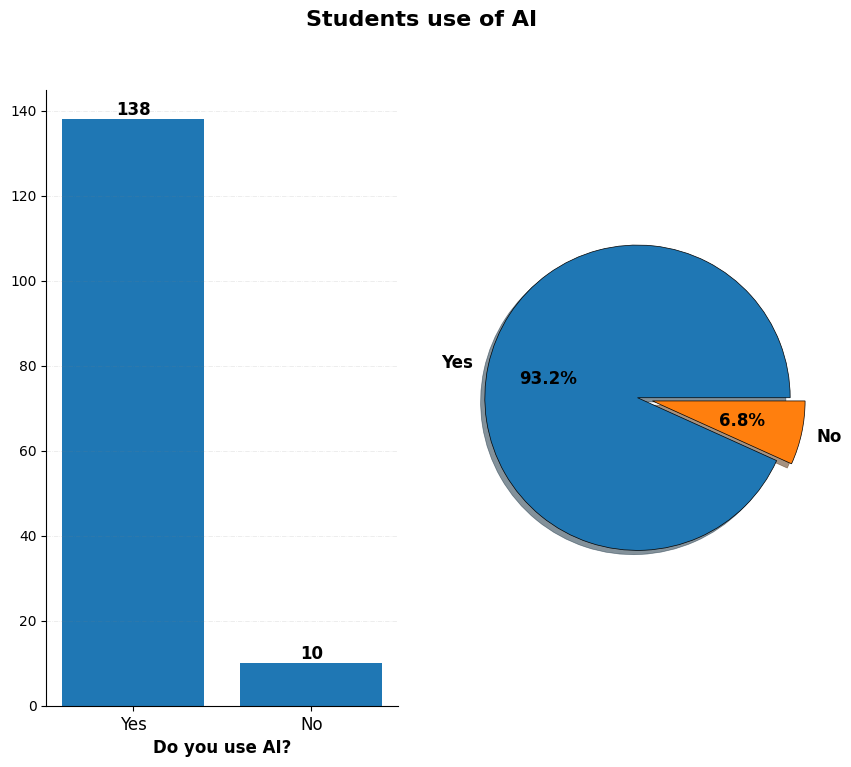

In [757]:
# Count the value in the column
ai_use = df["AI_use"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10,8))
fig.suptitle("Students use of AI", fontsize=16, fontweight="bold")
ax[0].bar(ai_use.index, ai_use.values)

ax[0].grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="y")

for i in range(len(ai_use.index)):
    ax[0].text(i, ai_use.values[i]+1, ai_use.values[i], ha = 'center', fontweight="bold", fontsize=12)

ax[0].tick_params(axis="x", labelsize=12)
ax[0].spines['right'].set_visible(False) 
ax[0].spines['top'].set_visible(False)
ax[0].set_xlabel("Do you use AI?", fontsize=12, fontweight="bold")

# Pie chart to show the percentages
explode = (0.1 , 0.0)
wedgeprops = {"linewidth": 0.5, 'edgecolor': "black"}
ax[1].pie(ai_use.values, labels=ai_use.index, 
          explode=explode, autopct="%1.1f%%", shadow=True, wedgeprops=wedgeprops,
          textprops={"fontsize": 12, "fontweight": "bold"})
ax[1].axis("equal")

Closer look to international student use of AI

(-1.1, 1.1, -1.1, 1.1)

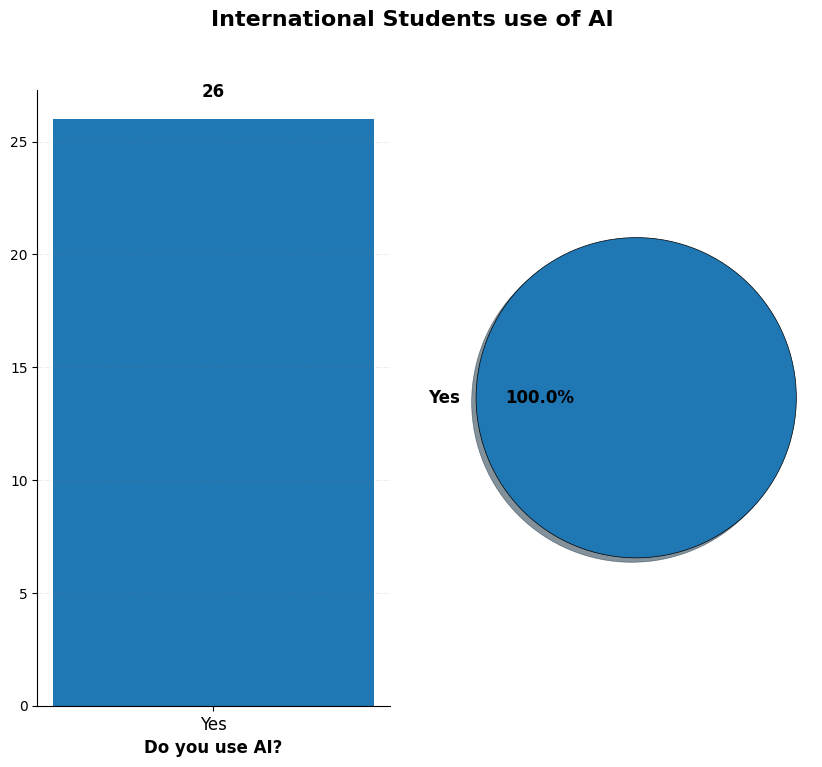

In [758]:
# Take the subset of the original dataframe
df_inter = df[df["Language"] == "Non-Native English Speaker"]

# Count the value in the column
ai_use_int = df_inter["AI_use"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10,8))
fig.suptitle("International Students use of AI", fontsize=16, fontweight="bold")
ax[0].bar(ai_use_int.index, ai_use_int.values)

ax[0].grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="y")

for i in range(len(ai_use_int.index)):
    ax[0].text(i, ai_use_int.values[i]+1, ai_use_int.values[i], ha = 'center', fontweight="bold", fontsize=12)

ax[0].tick_params(axis="x", labelsize=12)
ax[0].spines['right'].set_visible(False) 
ax[0].spines['top'].set_visible(False)
ax[0].set_xlabel("Do you use AI?", fontsize=12, fontweight="bold")

# Pie chart to show the percentages
wedgeprops = {"linewidth": 0.5, 'edgecolor': "black"}
ax[1].pie(ai_use_int.values, labels=ai_use_int.index, 
          autopct="%1.1f%%", shadow=True, wedgeprops=wedgeprops,
          textprops={"fontsize": 12, "fontweight": "bold"})
ax[1].axis("equal")

How Frequently do student use AI in their academic life.

Timestamp         0
Language          0
Field_of_study    2
AI_aw             0
AI_use            0
Frequency         0
Purpose           0
AI_tool           0
Consent           0
dtype: int64


C:\Users\Utente\AppData\Local\Temp\ipykernel_9736\2336248984.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_2 = df_yes.pivot_table(index="Frequency", columns="Field_of_study", aggfunc="size", fill_value=0)


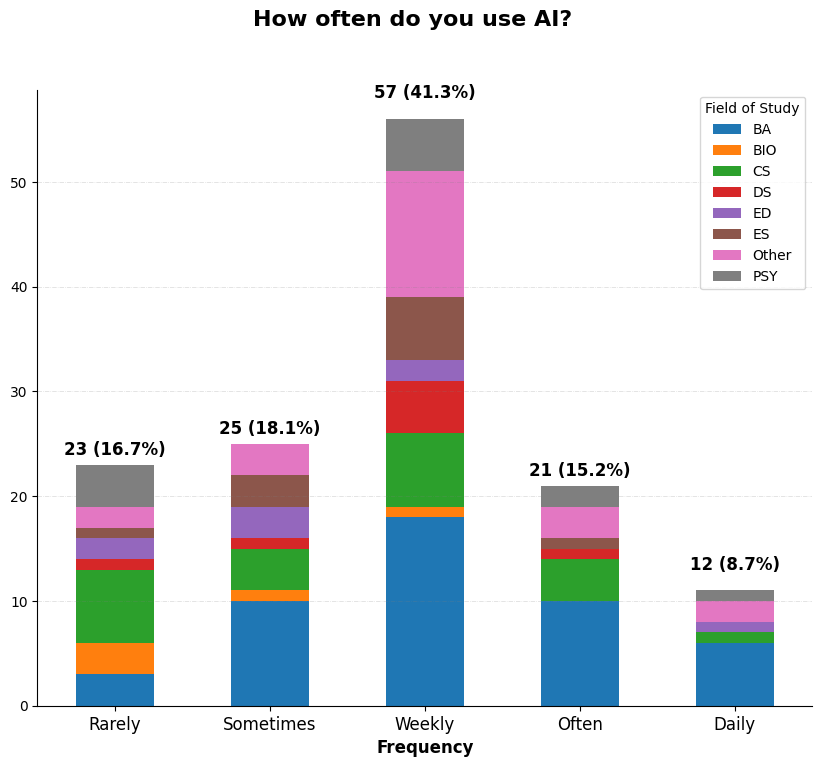

In [759]:
# Take only students who use AI
df_yes = df[df["AI_use"] == "Yes"].copy()

value_map = {
    "1.0": "Rarely",
    "2.0": "Sometimes",
    "3.0": "Weekly",
    "4.0": "Often",
    "5.0": "Daily"
}

# Change data type to map value correctly
df_yes["Frequency"] = df_yes["Frequency"].astype(str)
df_yes["Frequency"] = df_yes["Frequency"].map(value_map)

# Define custom category order for the Frequency column
category_order = pd.CategoricalDtype(categories=["Rarely", "Sometimes", "Weekly", "Often", "Daily"], ordered=True)

# Apply the custom category to the Frequency column
df_yes["Frequency"] = df_yes["Frequency"].astype(category_order)

# Number of values in the frequency column
frequency = df_yes["Frequency"].value_counts().sort_index()

# Check for missing values
print(df_yes.isnull().sum())
df_yes = df_yes.dropna()

# Filter only Field of study with more than 5 observations
field_counts = df_yes["Field_of_study"].value_counts()
df_yes["Field_of_study"] = df_yes["Field_of_study"].apply(lambda x: x if field_counts[x] >= 5 else "Other")

# Create a pivot table to count "Yes" and "No" for each field of study
pivot_table_2 = df_yes.pivot_table(index="Frequency", columns="Field_of_study", aggfunc="size", fill_value=0)

# Create bar plot with the values
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.suptitle("How often do you use AI?", fontsize=16, fontweight="bold")

pivot_table_2.plot(kind="bar", stacked=True, ax=ax)
#ax.bar(frequency.index, frequency.values)
# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.3, axis="y")


total = frequency.values.sum()
for i in range(len(frequency.index)):
    value = frequency.values[i]
    percentage = (value / total) * 100
    ax.text(i, value + 1, f'{value} ({percentage:.1f}%)', ha='center', fontweight="bold", fontsize=12)

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.tick_params(axis="x", rotation=0, labelsize=12)
ax.set_xlabel(xlabel="Frequency", fontsize=12, fontweight="bold")
ax.legend(title="Field of Study")
plt.show()

In [760]:
# Separate the data by student type
domestic_students = df[df["Language"] == "Native English Speaker"]["Frequency"]
international_students = df[df["Language"] == "Non-Native English Speaker"]["Frequency"]

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(domestic_students, international_students, alternative='two-sided')

# Output the test results
print("Mann-Whitney U Test")
print("U statistic:", stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in AI usage frequency between Domestic and International students.")
else:
    print("There is no significant difference in AI usage frequency between Domestic and International students.")

Mann-Whitney U Test
U statistic: 1477.5
p-value: 0.5708997876164856
There is no significant difference in AI usage frequency between Domestic and International students.


Distribution of AI usage frequency by field of study, showing the percentage of students in each subject area who use AI at varying frequencies.

In [761]:
# Group the relevant columns
group = df.groupby(["Field_of_study", "Frequency"]).size()
group = group.reset_index(name='Count')

# Calculate the total number of responses in a field of study
total_counts = group["Field_of_study"].value_counts()

# Create a new column total
group["Total"] = group["Field_of_study"].map(total_counts)

# Calculate the percentage for each field of study
group["Percentage"] = round((group["Count"]*100)/group["Total"], 2)
group.head()

,Field_of_study,Frequency,Count,Total,Percentage
0,ACC,1.0,1,3,33.33
1,ACC,2.0,1,3,33.33
2,ACC,3.0,2,3,66.67
3,ART,3.0,2,3,66.67
4,ART,4.0,1,3,33.33


For what purpose students use AI

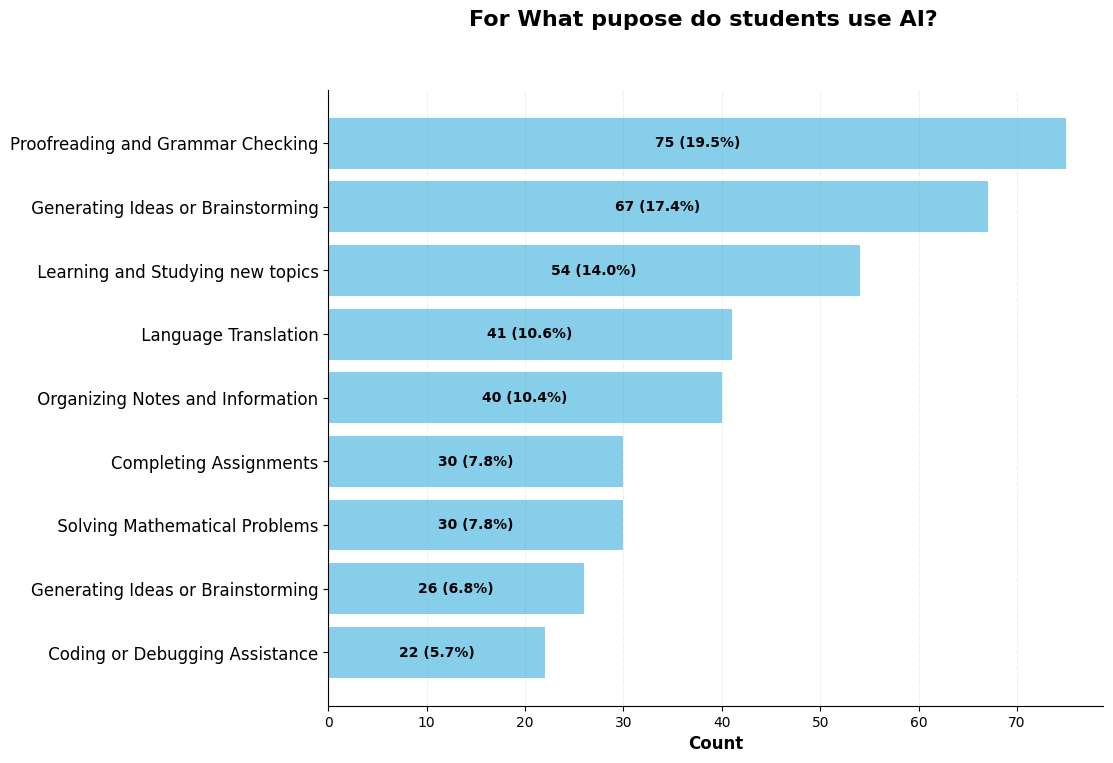

In [762]:
# Take a look at the column we want to analyze
df_yes["Purpose"].head()

# Create a row for each single purpose for analysis
df_yes["Purpose_split"] = df_yes["Purpose"].str.split(",")
df_yes_exp = df_yes.explode("Purpose_split")

# Consider only purposes with more than 20 occurencies
field_counts = df_yes_exp["Purpose_split"].value_counts()
fields_to_keep = field_counts[field_counts >= 20].index
df_yes_exp = df_yes_exp[df_yes_exp["Purpose_split"].isin(fields_to_keep)]


# Count occurencies 
count_purpose = df_yes_exp["Purpose_split"].value_counts()


fig, ax = plt.subplots(1,1,figsize=(10,8))
plt.suptitle("For What pupose do students use AI?", fontsize=16, fontweight="bold")
ax.barh(count_purpose.index, count_purpose.values, color='skyblue')

# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="x")

total = count_purpose.values.sum()
ind = 0
for p in ax.patches:
    width = p.get_width()
    value = count_purpose.values[ind]
    perc = (value/total)*100
    ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, 
            f'{int(width)} ({perc:.1f}%)', ha="center", va="center", color="black", fontweight="bold")
    ind += 1


ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.tick_params(axis="y", rotation=0, labelsize=12)
ax.set_xlabel(xlabel="Count", fontsize=12, fontweight="bold")
ax.invert_yaxis()
plt.show()

What generative AI tools students use the most

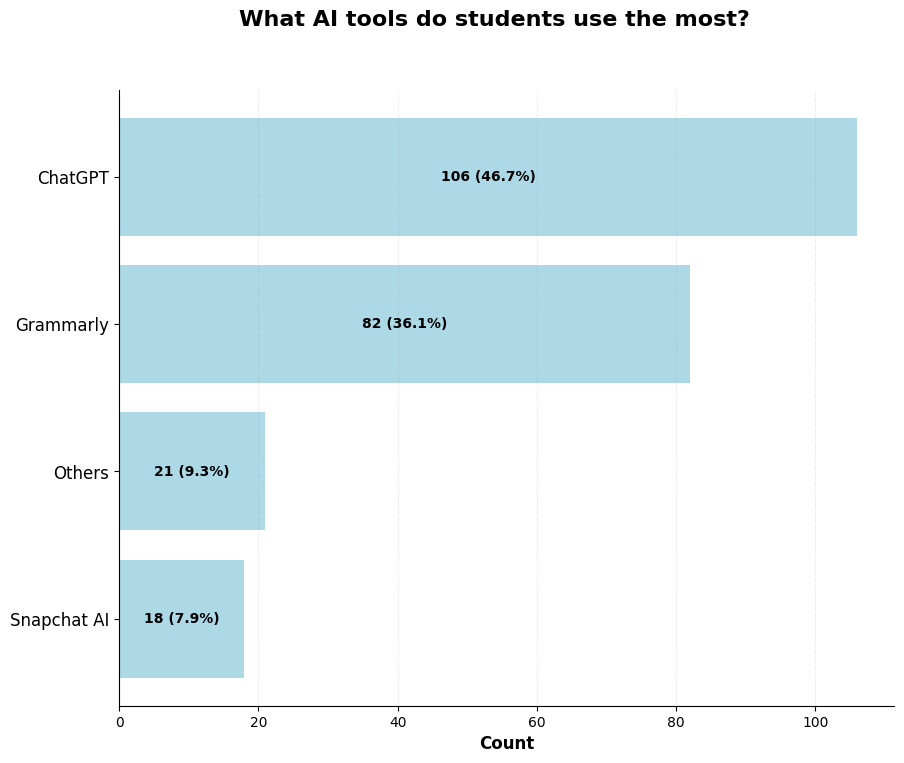

In [763]:
# Column of interest
df_yes["AI_tool"].head()

# Create a row for each single tool for analysis
df_yes["Tools_split"] = df_yes["AI_tool"].str.split(",")
df_yes_tool = df_yes.explode("Tools_split")

# Filter more used tools
count = df_yes_tool["Tools_split"].value_counts()
df_yes_tool["Tools_split"] = df_yes_tool["Tools_split"].apply(lambda x: x if count[x] >= 10 else "Others")
"""keep_field = count[count >= 10].index
df_yes_tool = df_yes_tool[df_yes_tool["Tools_split"].isin(keep_field)]"""
df_yes_tool["Tools_split"] = df_yes_tool["Tools_split"].str.strip()

# Count for analysis
count_tool = df_yes_tool["Tools_split"].value_counts()

# Visualization
fig, ax = plt.subplots(1,1,figsize=(10,8))
plt.suptitle("What AI tools do students use the most?", fontsize=16, fontweight="bold")
ax.barh(count_tool.index, count_tool.values, color = "lightblue")

# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="x")

total = count_tool.values.sum()
ind = 0
for p in ax.patches:
    width = p.get_width()
    value = count_tool.values[ind]
    perc = (value/total)*100
    ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2, 
            f'{int(width)} ({perc:.1f}%)', ha="center", va="center", color="black", fontweight="bold")
    ind += 1


ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.tick_params(axis="y", rotation=0, labelsize=12)
ax.set_xlabel(xlabel="Count", fontsize=12, fontweight="bold")
ax.invert_yaxis()
plt.show()

Frequency of use difference between Native and Non-native English speaker

C:\Users\Utente\AppData\Local\Temp\ipykernel_9736\1752199484.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df1.groupby(["Frequency", "Language"]).size().unstack(fill_value=0)


           Native English Speakers  Non-Native English Speakers
Frequency                                                      
Rarely                        21.3                         15.4
Sometimes                     18.0                         19.2
Weekly                        39.3                         38.5
Often                         12.3                         23.1
Daily                          9.0                          3.8


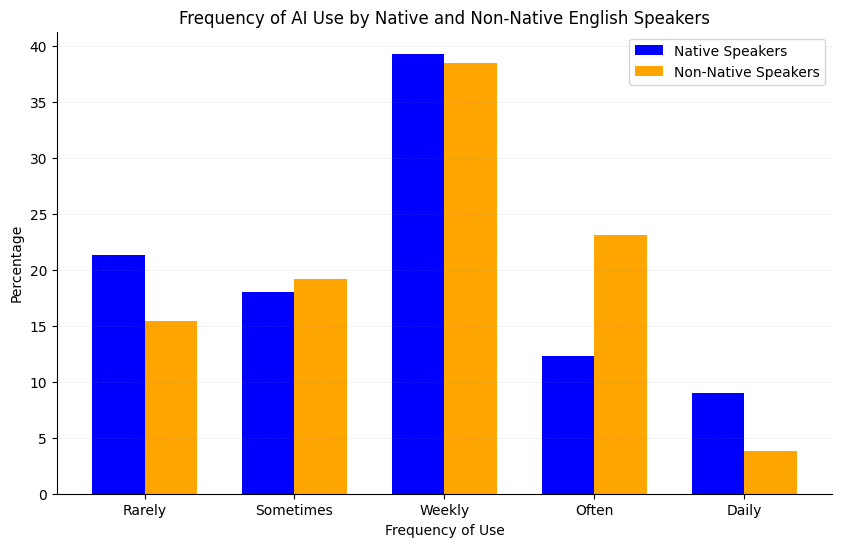

In [764]:
df1 = df.copy()

value_map = {
    "1.0": "Rarely",
    "2.0": "Sometimes",
    "3.0": "Weekly",
    "4.0": "Often",
    "5.0": "Daily"
}

# Change data type to map value correctly
df1["Frequency"] = df1["Frequency"].astype(str)
df1["Frequency"] = df1["Frequency"].map(value_map)

# Define custom category order for the Frequency column
category_order = pd.CategoricalDtype(categories=["Rarely", "Sometimes", "Weekly", "Often", "Daily"], ordered=True)

# Apply the custom category to the Frequency column
df1["Frequency"] = df1["Frequency"].astype(category_order)

grouped_data = df1.groupby(["Frequency", "Language"]).size().unstack(fill_value=0)

# Calculate the total count for each language category
totals = grouped_data.sum(axis=0)

# Calculate percentage for each frequency use within each language category
percentage_table = (grouped_data / totals * 100).round(1)

# Rename columns for clarity, if needed
percentage_table.columns = ["Native English Speakers", "Non-Native English Speakers"]

# Display the final table
print(percentage_table)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.35

# Define X-axis positions for each frequency
r1 = range(len(grouped_data.index))
r2 = [x + bar_width for x in r1]

# Plot bars
ax.bar(r1, percentage_table["Native English Speakers"], color='b', width=bar_width, label="Native Speakers")
ax.bar(r2, percentage_table["Non-Native English Speakers"], color='orange', width=bar_width, label="Non-Native Speakers")

# Adding a grid
ax.grid(visible=True, color="grey", linestyle="-.", linewidth=0.5, alpha=0.2, axis="y")

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.set_xlabel('Frequency of Use')
ax.set_ylabel('Percentage')
ax.set_title('Frequency of AI Use by Native and Non-Native English Speakers')
ax.set_xticks([r + bar_width / 2 for r in range(len(grouped_data.index))])
ax.set_xticklabels(grouped_data.index)

# Add legend
ax.legend()

# Show plot
plt.show()

In which academic disciplines is Generative AI usage most prevalent among students?

In [765]:
# Group the relevant columns and calculate counts for each combination of Field of Study and AI_use
group = df.groupby(["Field_of_study", "AI_use"]).size().unstack(fill_value=0)

# Calculate the total counts for each Field of Study
totals_per_field = group.sum(axis=1)

# Calculate percentages for each AI_use category within each Field of Study
percentage_table_AI_use = (group.T / totals_per_field).T * 100

# Round the percentages for clarity
percentage_table_AI_use = percentage_table_AI_use.round(1)

# Display the table
print(percentage_table_AI_use)

AI_use             No    Yes
Field_of_study              
ACC               0.0  100.0
ART               0.0  100.0
ATH             100.0    0.0
BA                0.0  100.0
BIO              28.6   71.4
COM              75.0   25.0
CS                0.0  100.0
DS                0.0  100.0
ECO               0.0  100.0
ED                0.0  100.0
ENG              50.0   50.0
ES                8.3   91.7
MSC               0.0  100.0
MTH               0.0  100.0
NUR               0.0  100.0
PSY               7.7   92.3
REL             100.0    0.0
SPH               0.0  100.0
